# **The Sparks Foundation Internship**
# Task 1- Prediction Using Supervised ML
## By: Ahmad Moustafa
### Data Science and Business Analytics Intern

In [25]:
# importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# loading our dataset
Students = pd.read_csv('http://bit.ly/w-data')

#### 1. Exploring Our DataSet

In [27]:
#Exploring the dataset
Students.shape

(25, 2)

In [28]:
Students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:
Students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


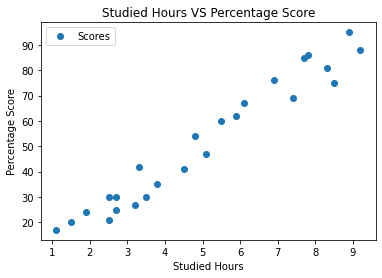

In [30]:
# Plotting our data on 2-D graph and see if we can manually find any relationship between the data
Students.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Studied Hours')
plt.ylabel('Percentage Score')
plt.title('Studied Hours VS Percentage Score')
plt.show()

#### 2. Preparing the Data 
##### In this Part we are going to divide the data into "attributes" and "labels" Attributes are the independent variables while labels are dependent variables whose values are to be predicted. we want to predict the percentage score depending upon the hours studied.

In [31]:
X = Students.iloc[:, :-1].values
y = Students.iloc[:, 1].values

##### Now we have our attributes and labels, So the next step is to split this data into training and test sets. We'll do this by using Scikit-learn's built-in **train_test_split()**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

#### 3. Training The Algorithm
##### After Spliting our data into training and testing sets, now is the time to train our algorithm

In [33]:
# Training our Algorithm with Sklearn library
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

2.0181600414346974
[9.91065648]


##### This means that if a student studies one hour more than they previously studied for an exam, it expects to achieve an increase of 9.91% in the score.

#### 4. Making Prediction

In [35]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Evaluating the algorithm

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


##### The value of root mean squared error is 4.65, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

Now let's predict the score if our student studied for 9.25 hours

In [ ]:
hours = [9.25]
Score = regressor.predict([hours])
print("score = {}".format(round(Score[0],2)))

score = 93.69
